<a href="https://colab.research.google.com/github/YinGuoX/Deep_Learning_Keras_WithDeeplizard/blob/master/10_Image_Preparation_For_A_Convolutional_Neural_Network_With_TensorFlow's_Keras_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preparation For A Convolutional Neural Network With TensorFlow's Keras API

在本节课中，我们将学习所有必要的图像准备和处理步骤，以训练我们的第一个卷积神经网络(CNN)。

在接下来的几集里，我们的目标将是建立和训练一个能够准确识别猫和狗图像的CNN。

## 1. 获取数据
我们需要做的第一件事是获取并准备要用于训练CNN的数据。

我们将使用的数据集是Kaggle狗与猫比赛中数据的随机子集。 您可以在[此处](https://www.kaggle.com/c/dogs-vs-cats/data)下载数据。

## 2. 组织数据

现在，我们需要在磁盘上组织目录结构以保存数据集。 我们将手动执行组织的某些部分，然后以编程方式完成其余部分。

复制下载的dogs-vs-cats.zip文件，然后将其粘贴到您要使用的目录中。 相对于我们将要使用的Jupyter笔记本，我将dogs-vs-cats.zip放在一个名为data的目录中。

现在，解压缩dogs-vs-cats.zip，然后从内部解压缩train.zip。 目前我们暂时无法使用提供的测试集，因此您可以根据需要将test1.zip移至其他位置。

接下来，从train目录中选择所有的图像文件，并将它们移动到base dogs-vs-cats目录中。最后，删除空的train文件夹。

手工劳动到此为止，我们的dogs-vs-cats目录中有25,000张带有标签的猫和狗的图像。 注意，标签包含在文件名中。 现在，我们将以编程方式完成数据组织的其余部分。

首先，让我们导入在接下来的几个CNN集中将要使用的所有库。

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

使用下面的脚本，我们将把数据组织到训练、验证和测试集中。为此，我们将把数据的子集移动到每个单独数据集的子目录中。

In [ ]:
# 在colab上使用的云端数据
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/My Drive/DeepLearning_AI_Course/Deeplizard/Keras - Python Deep Learning Neural Network API/Data/dogs-vs-cats"

# 更改当前系统的路径
os.chdir(path)
# 显示当前路径的文件夹名字
print(os.listdir())

# 获得当前路径
os.getcwd()

['Dog', 'Cat']


'/content/drive/My Drive/DeepLearning_AI_Course/Deeplizard/Keras - Python Deep Learning Neural Network API/Data/dogs-vs-cats'

In [ ]:
os.chdir('./Dog')
print(os.listdir())

# 将数据组织到训练集、验证集、测试集
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('valid/dog')
  os.makedirs('test/dog')
     
  for i in random.sample(glob.glob('*'), 500):
    shutil.move(i, 'train/dog')
       
  for i in random.sample(glob.glob('*'), 100):
    shutil.move(i, 'valid/dog')
  for i in random.sample(glob.glob('*'), 50):
      shutil.move(i, 'test/dog')

os.chdir('..')
os.chdir('./Cat')
print(os.listdir())
if os.path.isdir('train/cat') is False:
  os.makedirs('train/cat')
  os.makedirs('valid/cat')
  os.makedirs('test/cat')
  for i in random.sample(glob.glob('*'), 500):
    shutil.move(i, 'train/cat') 
  for i in random.sample(glob.glob('*'), 100):
    shutil.move(i, 'valid/cat') 
  for i in random.sample(glob.glob('*'), 50):
    shutil.move(i, 'test/cat') 

['9069.jpg', '9061.jpg', '9067.jpg', '9037.jpg', '9048.jpg', '9045.jpg', '9035.jpg', '9044.jpg', '9039.jpg', '9060.jpg', '9042.jpg', '905.jpg', '9038.jpg', '9065.jpg', '9057.jpg', '9063.jpg', '9052.jpg', '9076.jpg', '9078.jpg', '9073.jpg', '9072.jpg', '9083.jpg', '9082.jpg', '907.jpg', '9089.jpg', '9071.jpg', '9084.jpg', '9070.jpg', '9080.jpg', '9086.jpg', '9081.jpg', '908.jpg', '9079.jpg', '9088.jpg', '9074.jpg', '9087.jpg', '9075.jpg', '9077.jpg', '9091.jpg', '9117.jpg', '9124.jpg', '909.jpg', '912.jpg', '9107.jpg', '911.jpg', '9109.jpg', '9097.jpg', '9112.jpg', '9125.jpg', '910.jpg', '9105.jpg', '9123.jpg', '9111.jpg', '9100.jpg', '9116.jpg', '91.jpg', '9092.jpg', '9126.jpg', '9120.jpg', '9122.jpg', '9093.jpg', '9106.jpg', '9101.jpg', '9119.jpg', '9090.jpg', '9098.jpg', '9094.jpg', '9102.jpg', '9114.jpg', '9104.jpg', '9110.jpg', '9121.jpg', '9113.jpg', '9096.jpg', '9108.jpg', '9118.jpg', '9115.jpg', '9095.jpg', '9099.jpg', '9103.jpg', '9150.jpg', '9159.jpg', '9160.jpg', '9140.jpg', 

我们首先检查目录结构是否已经到位。 如果不是，我们继续执行脚本。 该脚本首先创建Train，valid和test目录，每个目录都包含称为dog和cat的子目录。

完整的数据集包含25,000张图像，其中一半是猫，一半是狗。 我们几乎不需要这么多数据来执行我们要执行的任务，因此我们将使用一个子集。 脚本的其余部分将1000个样本移入训练集中，将200个样本移入验证集中，并将100个样本移入测试集中。 每组有相等数量的猫和狗。

其余未使用的数据将保留在基本dogs-vs-cats目录中。 如有需要，请随时删除此数据。

### 2.1 没有测试标签的场景
注意，对于这个数据集，我们已经有了测试集的标签。很多时候，我们可能没有测试数据的相应标签。事实上，如果我们使用从Kaggle下载的测试集，而不是制作我们自己的测试集，那么我们会看到对应的标签没有包含在内。

在我们没有测试集标签的场景中，测试目录结构应该是这样的



```
test\unknown\
```

所有未标记的测试文件将进入未知的子目录。请注意，如果愿意，可以将目录命名为其他名称，而不是未知。

如果您没有访问测试标签的权限，那么需要以不同的方式执行另外一个步骤，这将在下一节的结尾部分提到。

这就是磁盘上的所有数据组织。现在，让我们进行的数据处理在将数据传递到网络之前。



## 3. 数据处理
我们已经导入了上面所有的TensorFlow和Keras模块。如果你使用的是GPU(不是必需的)，那么我们可以通过下面的代码检查TensorFlow是否能够识别GPU。由于我们在之前的章节中提到的原因，启用GPU上的内存增长也是非常有用的。



```
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
```

然后，我们创建变量，为其分配到训练、验证和测试数据目录的路径。

In [ ]:
os.chdir('..')
print(os.listdir())

['dogs-vs-cats']


In [ ]:
train_path = './dogs-vs-cats/train'
valid_path = './dogs-vs-cats/valid'
test_path = './dogs-vs-cats/test'

我们可以指定相对于Jupyter笔记本所在位置的绝对路径或相对路径。 我们指定相对路径。


现在，我们使用Keras的ImageDataGenerator类从训练，验证和测试集中创建一批数据。

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


ImageDataGenerator.flow_from_directory（）创建一个DirectoryIterator，从相应的数据目录中生成一批标准化的张量图像数据。

注意，对于ImageDataGenerator的每个数据集，我们指定preprocessing_function = tf.keras.applications.vgg16.preprocess_input。 现在，仅需了解此操作即可对图像进行额外的处理。 在接下来几集中，我们将介绍经过预训练的VGG16 CNN时，此处理过程的确切含义。

对于flow_from_directory（），我们首先指定数据的路径。 然后，我们指定图像的target_size，这会将所有图像调整为指定大小。 我们在此处指定的大小由神经网络期望的输入大小确定。

classes参数需要一个包含基础类名称的列表，最后，我们指定batch_size。

我们还仅对test_batches指定shuffle = False。 这是因为，稍后在将模型的评估结果绘制到混淆矩阵时，我们将需要能够访问测试集的未改组标签。 默认情况下，数据集是随机的。

注意，如果您不知道测试数据的标签，则需要修改test_batches变量。 具体来说，更改将是在flow_from_directory（）中设置参数class = None和class_mode = None。

## 4.可视化这些数据
现在，我们调用next（train_batches）从训练集中生成一批图像和标签。 请注意，此批次的大小由我们在创建train_batches时设置的batch_size决定。



In [ ]:
imgs, labels = next(train_batches)

然后，我们使用从[TensorFlow文档](https://www.tensorflow.org/tutorials/images/classification#visualize_training_images)获得的绘图功能在Jupyter笔记本中绘图处理后的图像。

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

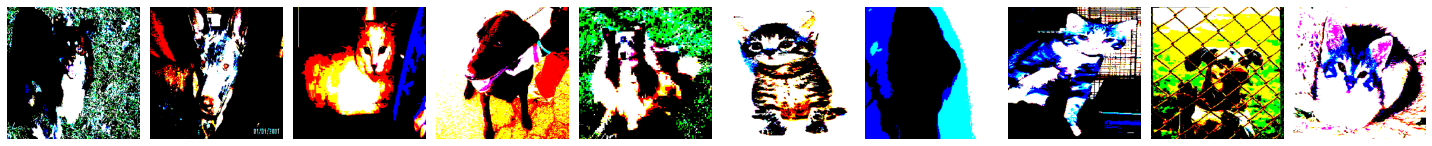

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

这就是训练集中第一个经过处理的随机批次的样子。 请注意，颜色似乎失真。 这与我们应用于数据集的VGG16处理有关，我们将在下一集中进行讨论。 现在不必担心，只要知道RGB像素数据已经过处理，就可以在将图像数据传递到网络之前看起来像这样。

注意，狗用[0,1]的单热点编码表示，猫用[1,0]表示。

现在我们已经准备好处理这些数据了!在接下来的几集里，我们将使用这些数据来训练卷积神经网络。